In [1]:
import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
features = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].copy()

In [4]:
features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})


In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # ลองเริ่มที่ 3 กลุ่ม
clusters = kmeans.fit_predict(features_scaled)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)


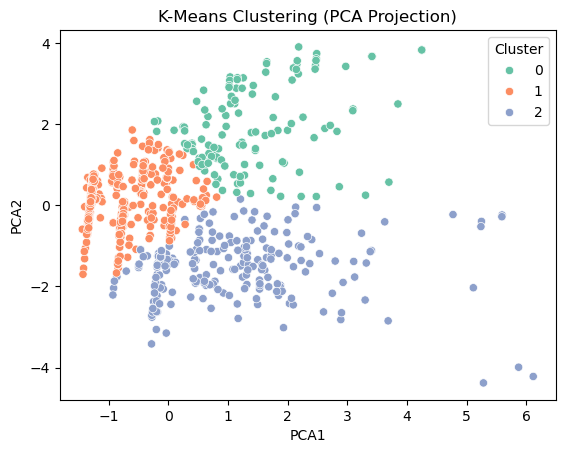

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = pd.DataFrame({
    'PCA1': pca_result[:, 0],
    'PCA2': pca_result[:, 1],
    'Cluster': clusters
})

sns.scatterplot(data=plot_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('K-Means Clustering (PCA Projection)')
plt.show()


In [11]:
df['Cluster'] = clusters
cluster_summary = df.groupby('Cluster')[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].mean()
print(cluster_summary)


               Age       Fare    Pclass     SibSp     Parch
Cluster                                                    
0        15.127155  32.235306  2.639098  1.977444  1.774436
1        28.474416  11.974204  2.763359  0.200382  0.055344
2        40.350490  77.487910  1.102564  0.418803  0.320513
